# 经典平均风险优化
## 1. 下载数据
通过同花顺iFind金融终端获取中信一级行业指数5年数据，将数据集保存在'./data/index_dataset.xlsx'中，通过pandas导入数据，并将日期列作为索引并将格式转换为时间戳。

In [39]:
import pandas as pd
import numpy as np

datapath = 'E:/Project/folio/data/dataset_multiassets.xlsx'
data = pd.read_excel(datapath,
                     index_col='时间',
                     parse_dates=True,
                     na_values=['--'],
                     thousands=',')
data.dropna(inplace=True)

In [40]:
data.head()

,CTA趋势精选指数,对冲策略精选指数,股票策略精选指数,宏观策略精选指数,市场中性精选指数,事件驱动精选指数,套利策略精选指数,债券基金精选指数
时间,,,,,,,,
2013-01-01,100000.0000%,100000.0000%,100000.0000%,100000.0000%,100000.0000%,100000.0000%,100000.0000%,100000.0000%
2014-01-03,101737.0000%,113835.0000%,118591.0000%,144260.0000%,107669.0000%,142496.0000%,126245.0000%,102457.0000%
2014-01-10,103786.0000%,113441.0000%,116103.0000%,144789.0000%,107486.0000%,139680.0000%,124484.0000%,102487.0000%
2014-01-17,103505.0000%,113084.0000%,116816.0000%,143968.0000%,107374.0000%,139815.0000%,122724.0000%,102162.0000%
2014-01-24,104301.0000%,114791.0000%,120893.0000%,145562.0000%,108521.0000%,144453.0000%,129225.0000%,102509.0000%


In [41]:
data.columns

Index(['CTA趋势精选指数', '对冲策略精选指数', '股票策略精选指数', '宏观策略精选指数', '市场中性精选指数', '事件驱动精选指数',
       '套利策略精选指数', '债券基金精选指数'],
      dtype='object')

In [42]:
data = data.rename(columns={'CTA趋势精选指数':'CTA_Trend_Index',
                     '对冲策略精选指数':'Hedging_Strategy_Index',
                     '股票策略精选指数':'Stock_Strategy_Index',
                     '宏观策略精选指数':'Macro_Strategy_Index',
                     '市场中性精选指数':'Market_Neutral_Index',
                     '事件驱动精选指数':'Event_Driven_Index',
                     '套利策略精选指数':'Arbitrage_Strategy_Index',
                     '债券基金精选指数':'Bond_Fund_Index'})
data.head()

,CTA_Trend_Index,Hedging_Strategy_Index,Stock_Strategy_Index,Macro_Strategy_Index,Market_Neutral_Index,Event_Driven_Index,Arbitrage_Strategy_Index,Bond_Fund_Index
时间,,,,,,,,
2013-01-01,100000.0000%,100000.0000%,100000.0000%,100000.0000%,100000.0000%,100000.0000%,100000.0000%,100000.0000%
2014-01-03,101737.0000%,113835.0000%,118591.0000%,144260.0000%,107669.0000%,142496.0000%,126245.0000%,102457.0000%
2014-01-10,103786.0000%,113441.0000%,116103.0000%,144789.0000%,107486.0000%,139680.0000%,124484.0000%,102487.0000%
2014-01-17,103505.0000%,113084.0000%,116816.0000%,143968.0000%,107374.0000%,139815.0000%,122724.0000%,102162.0000%
2014-01-24,104301.0000%,114791.0000%,120893.0000%,145562.0000%,108521.0000%,144453.0000%,129225.0000%,102509.0000%


In [50]:
import warnings
from IPython import display

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# 计算周收益
Y = data.pct_change().dropna()
Y

,CTA_Trend_Index,Hedging_Strategy_Index,Stock_Strategy_Index,Macro_Strategy_Index,Market_Neutral_Index,Event_Driven_Index,Arbitrage_Strategy_Index,Bond_Fund_Index
时间,,,,,,,,
2014-01-03,1.7370%,13.8350%,18.5910%,44.2600%,7.6690%,42.4960%,26.2450%,2.4570%
2014-01-10,2.0140%,-0.3461%,-2.0980%,0.3667%,-0.1700%,-1.9762%,-1.3949%,0.0293%
2014-01-17,-0.2707%,-0.3147%,0.6141%,-0.5670%,-0.1042%,0.0966%,-1.4138%,-0.3171%
2014-01-24,0.7690%,1.5095%,3.4901%,1.1072%,1.0682%,3.3172%,5.2973%,0.3397%
2014-01-30,1.6625%,-0.8093%,0.1348%,-0.2398%,0.3327%,1.0619%,-6.0236%,0.3941%
...,...,...,...,...,...,...,...,...
2022-03-25,0.5718%,0.0042%,-1.2522%,0.7117%,0.5101%,-0.2815%,0.0487%,-0.1567%
2022-04-01,-0.4446%,-0.5019%,-0.4436%,-2.2822%,-0.3945%,0.7566%,0.0617%,0.4310%
2022-04-08,-0.5539%,-0.3978%,-1.5148%,-0.6596%,0.0948%,-3.3937%,-0.3317%,0.2016%


## 2. 估计均值方差组合
### 2.1 计算夏普比率最大化的组合

In [52]:
import riskfolio as rp

# Building the portfolio object
# 构建投资组合对象
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio
# 计算最优组合

# Select method and estimate input parameters:
# 选择方法并估计输入参数

method_mu='hist' # Method to estimate expected returns based on historical data. 通过历史数据估计预期收益
method_cov='hist' # Method to estimate covariance matrix based on historical data. 基于历史数据估计协方差矩阵

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:
# 估计最优投资组合：

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance 使用的风险度量方法，这里将运用方差
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe 目标函数，可以是 MinRisk、MaxRet、Utility 或 Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios 风险度量依赖历史情境
rf = 0 # Risk free rate 无风险利率
l = 0 # Risk aversion factor, only useful when obj is 'Utility' 风险厌恶因子

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

w.T

,CTA_Trend_Index,Hedging_Strategy_Index,Stock_Strategy_Index,Macro_Strategy_Index,Market_Neutral_Index,Event_Driven_Index,Arbitrage_Strategy_Index,Bond_Fund_Index
weights,16.1103%,0.0000%,0.0000%,0.0000%,23.2553%,0.0000%,0.0000%,60.6343%


### 2.2 绘制组合构成饼图

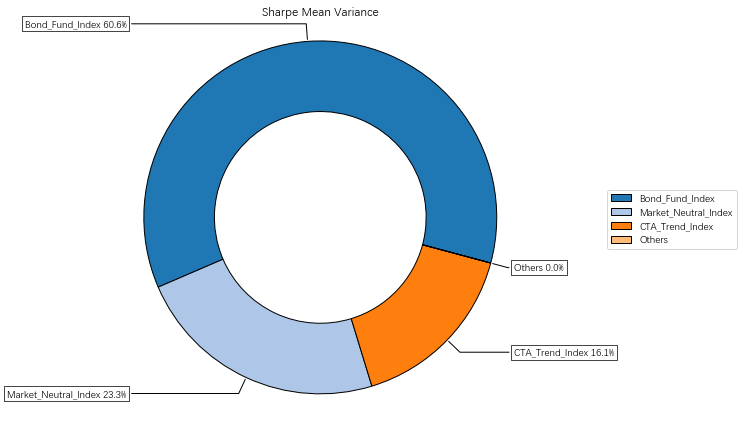

In [53]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Dengxian', 'sans-serif']

# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 计算有效前沿

In [55]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

frontier.T.head()

,CTA_Trend_Index,Hedging_Strategy_Index,Stock_Strategy_Index,Macro_Strategy_Index,Market_Neutral_Index,Event_Driven_Index,Arbitrage_Strategy_Index,Bond_Fund_Index
0,0.9906%,0.0000%,0.0000%,0.0000%,7.0927%,0.0000%,0.0000%,91.9167%
1,13.3607%,0.0000%,0.0000%,0.0000%,20.3183%,0.0000%,0.0000%,66.3210%
2,18.9817%,0.0000%,0.0000%,0.0000%,26.3320%,0.0000%,0.0000%,54.6863%
3,23.6189%,0.0000%,0.0000%,0.0000%,31.2861%,0.0000%,0.0000%,45.0950%
4,27.7869%,0.0000%,0.0000%,0.0000%,35.7425%,0.0000%,0.0000%,36.4706%


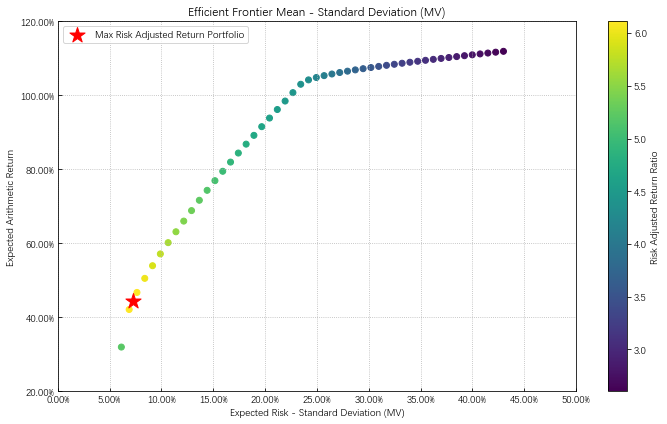

In [56]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

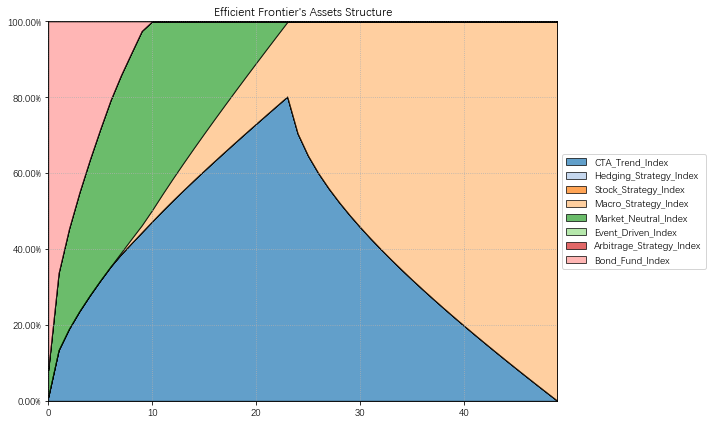

In [57]:
# Plotting efficient frontier composition
# 绘制有效的前沿组合

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. 估计平均风险组合
在这一部分中，我将计算几种风险度量的最优投资组合。首先，当 CVaR 是风险度量时，我将计算风险调整后收益最大化的投资组合，然后我将计算所有可用风险度量的风险调整后收益最大化的投资组合。
### 3.1 计算最大化回报/CVaR 比率的投资组合。

In [59]:
rm = 'CVaR' # Risk measure 风险度量

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

w.T

,CTA_Trend_Index,Hedging_Strategy_Index,Stock_Strategy_Index,Macro_Strategy_Index,Market_Neutral_Index,Event_Driven_Index,Arbitrage_Strategy_Index,Bond_Fund_Index
weights,12.4540%,0.0000%,0.0000%,0.0000%,39.2533%,0.0000%,14.8519%,33.4408%


### 3.2 绘制投资组合饼图

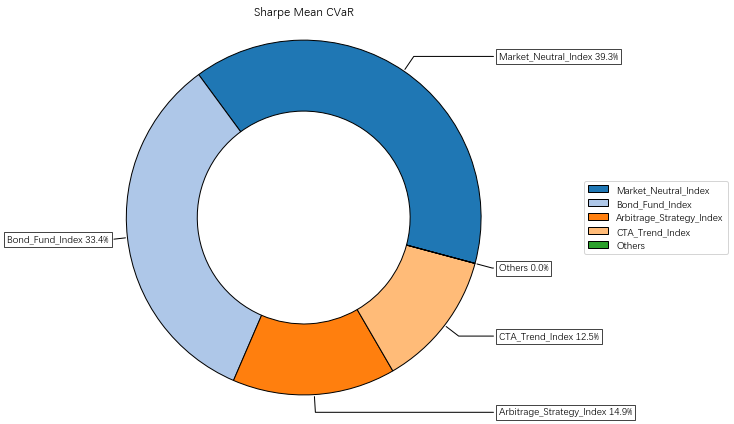

In [60]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 计算有效前沿

In [61]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

frontier.T.head()

,CTA_Trend_Index,Hedging_Strategy_Index,Stock_Strategy_Index,Macro_Strategy_Index,Market_Neutral_Index,Event_Driven_Index,Arbitrage_Strategy_Index,Bond_Fund_Index
0,8.6924%,0.0000%,0.0000%,0.0000%,36.0122%,0.0000%,5.0189%,50.2765%
1,13.2643%,0.0000%,0.0000%,0.0000%,38.5791%,0.0000%,14.9755%,33.1811%
2,16.8499%,0.0000%,0.0000%,0.0000%,40.5539%,0.0000%,16.0570%,26.5392%
3,18.0228%,0.0000%,0.0000%,1.4949%,45.1996%,0.0000%,16.8890%,18.3937%
4,19.4812%,0.0000%,0.0000%,2.5621%,50.5002%,0.0000%,17.8490%,9.6075%


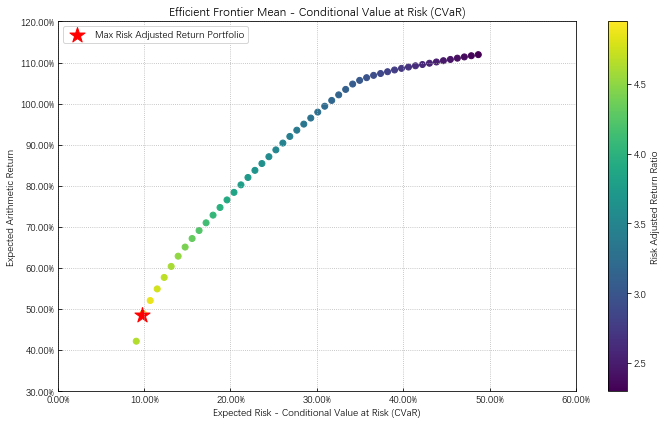

In [62]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

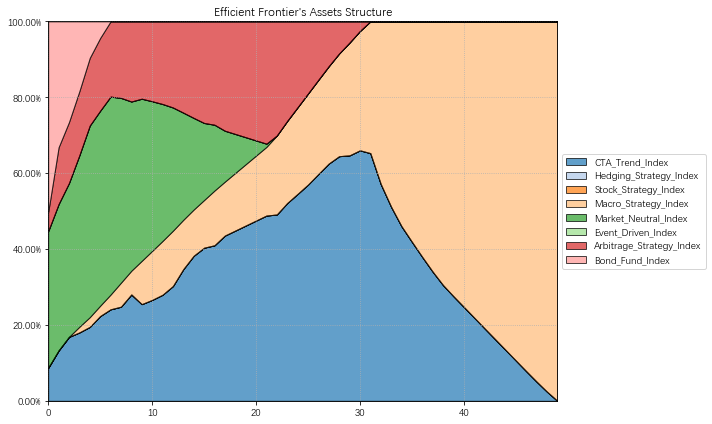

In [63]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### 3.4 计算多种风险度量的最佳投资组合

In [64]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)

w_s.columns = rms

In [65]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
CTA_Trend_Index,16.11%,11.67%,13.26%,12.64%,13.65%,12.45%,10.60%,6.97%,10.70%,8.52%,7.07%,8.90%,7.81%
Hedging_Strategy_Index,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
Stock_Strategy_Index,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
Macro_Strategy_Index,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,4.27%,0.00%,0.00%,0.00%,0.00%,0.00%
Market_Neutral_Index,23.26%,21.93%,29.23%,17.49%,32.85%,39.25%,41.21%,71.50%,23.11%,10.16%,13.94%,10.84%,16.80%
Event_Driven_Index,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
Arbitrage_Strategy_Index,0.00%,11.19%,13.73%,14.49%,14.10%,14.85%,16.45%,17.26%,22.84%,15.93%,16.52%,15.64%,15.84%
Bond_Fund_Index,60.63%,55.20%,43.78%,55.38%,39.40%,33.44%,31.73%,0.00%,43.35%,65.39%,62.47%,64.62%,59.55%


<AxesSubplot:>

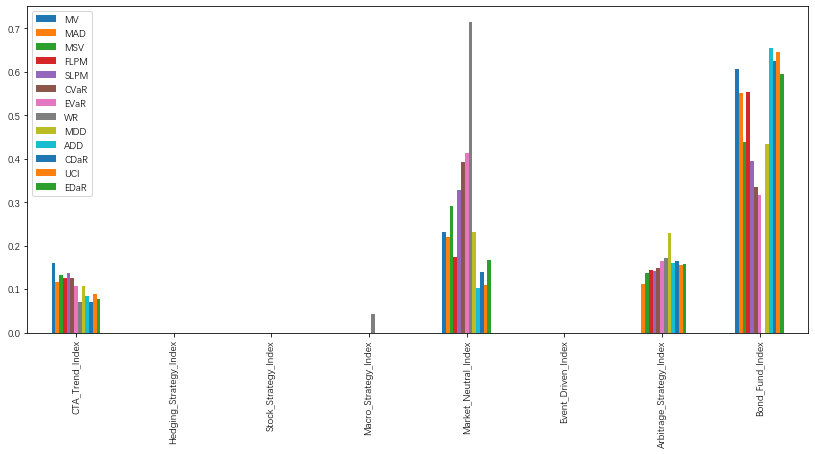

In [66]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

## 4 限制资产和资产类别
### 4.1 构建约束条件
可以使用字典来创建约束，但更喜欢在 excel 中创建表并使用 pandas.read_excel 上传它们。
尝试运用pandas.read_excel创建约束

In [77]:
# 从Excel导入asset_classes
asset_classes = pd.read_excel("E:\\Project\\folio\\data\\assets_classes.xlsx")
asset_classes

,Assets,Industry
0,CTA_Trend_Index,CTA趋势精选指数
1,Hedging_Strategy_Index,对冲策略精选指数
2,Stock_Strategy_Index,股票策略精选指数
3,Macro_Strategy_Index,宏观策略精选指数
4,Market_Neutral_Index,市场中性精选指数
5,Event_Driven_Index,事件驱动精选指数
6,Arbitrage_Strategy_Index,套利策略精选指数
7,Bond_Fund_Index,债券基金精选指数


In [80]:
#从Excel导入constraints
constraints = pd.read_excel('E:\\Project\\folio\\data\\constraints.xlsx')
constraints

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,NaN,NaN,<=,25.0000%,NaN,NaN,NaN,NaN
1,False,Classes,Industry,CTA趋势精选指数,<=,20.0000%,NaN,NaN,NaN,NaN
2,False,Classes,Industry,对冲策略精选指数,<=,20.0000%,NaN,NaN,NaN,NaN
3,False,Classes,Industry,股票策略精选指数,<=,20.0000%,NaN,NaN,NaN,NaN
4,False,Classes,Industry,宏观策略精选指数,<=,20.0000%,NaN,NaN,NaN,NaN
5,False,Classes,Industry,市场中性精选指数,<=,20.0000%,NaN,NaN,NaN,NaN
6,False,Classes,Industry,事件驱动精选指数,<=,20.0000%,NaN,NaN,NaN,NaN
7,False,Classes,Industry,套利策略精选指数,<=,20.0000%,NaN,NaN,NaN,NaN
8,False,Classes,Industry,债券基金精选指数,<=,25.0000%,NaN,NaN,NaN,NaN


In [81]:
A, B = rp.assets_constraints(constraints, asset_classes)

### 4.2 使用约束优化投资组合

In [83]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
w.T

,CTA_Trend_Index,Hedging_Strategy_Index,Stock_Strategy_Index,Macro_Strategy_Index,Market_Neutral_Index,Event_Driven_Index,Arbitrage_Strategy_Index,Bond_Fund_Index
weights,20.0000%,20.0000%,0.0000%,0.0000%,20.0000%,0.0000%,15.0000%,25.0000%


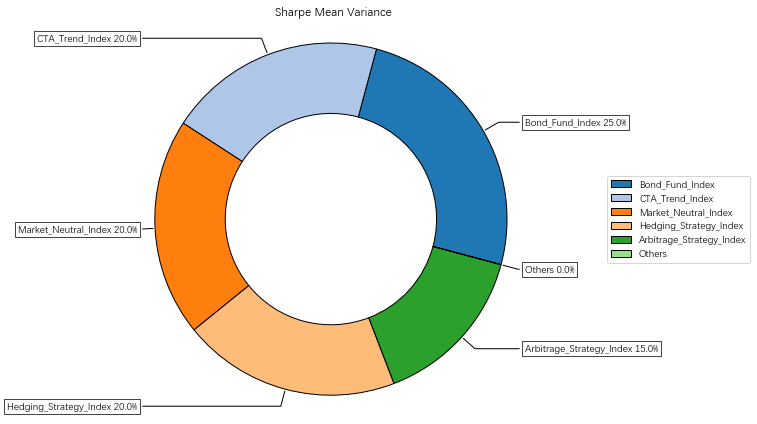

In [84]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [85]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)

w_classes

,Industry,weights
CTA_Trend_Index,CTA趋势精选指数,20.0000%
Hedging_Strategy_Index,对冲策略精选指数,20.0000%
Stock_Strategy_Index,股票策略精选指数,0.0000%
Macro_Strategy_Index,宏观策略精选指数,0.0000%
Market_Neutral_Index,市场中性精选指数,20.0000%
Event_Driven_Index,事件驱动精选指数,0.0000%
Arbitrage_Strategy_Index,套利策略精选指数,15.0000%
Bond_Fund_Index,债券基金精选指数,25.0000%


In [86]:
w_classes = w_classes.groupby(['Industry']).sum()
w_classes

,weights
Industry,
CTA趋势精选指数,20.0000%
事件驱动精选指数,0.0000%
债券基金精选指数,25.0000%
套利策略精选指数,15.0000%
宏观策略精选指数,0.0000%
对冲策略精选指数,20.0000%
市场中性精选指数,20.0000%
股票策略精选指数,0.0000%


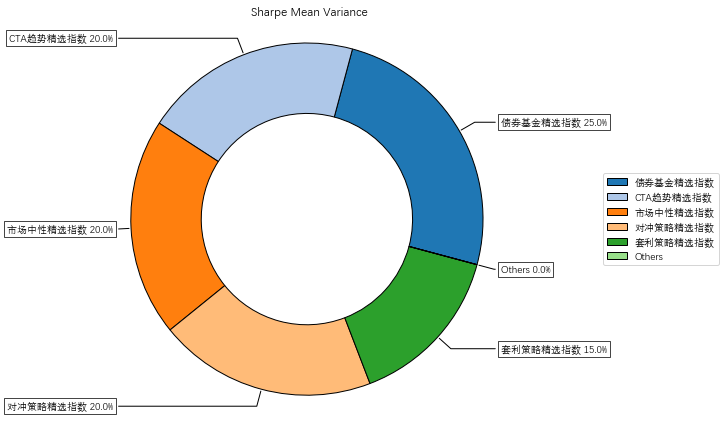

In [87]:
ax = rp.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

## 附：资产相关性

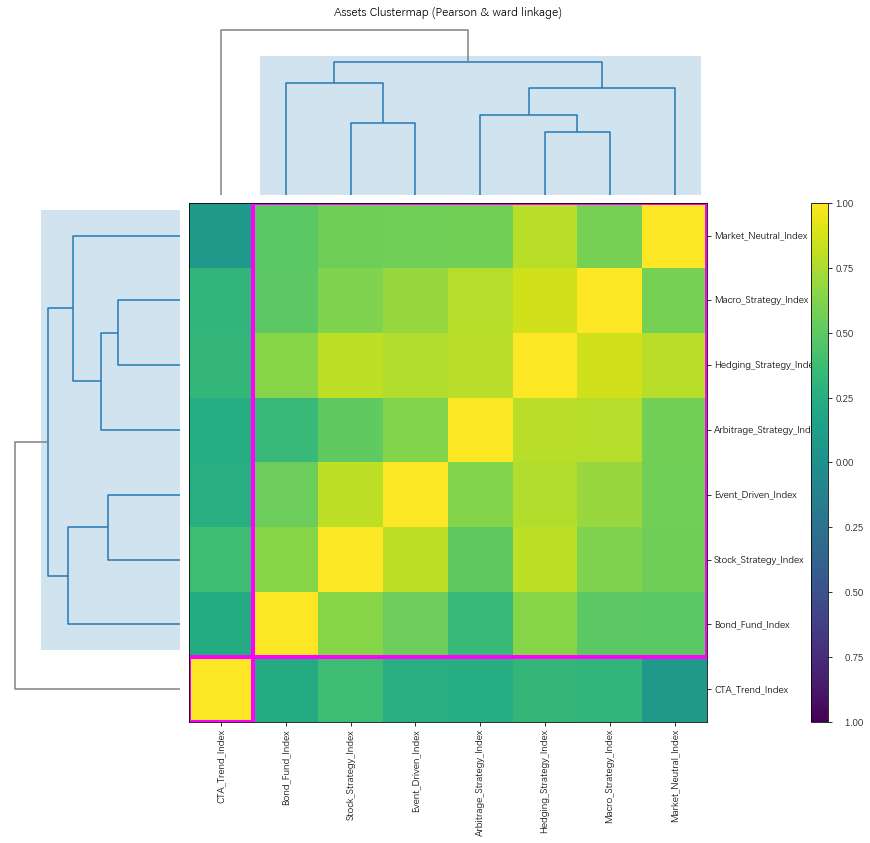

In [88]:
ax = rp.plot_clusters(returns=Y,
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)

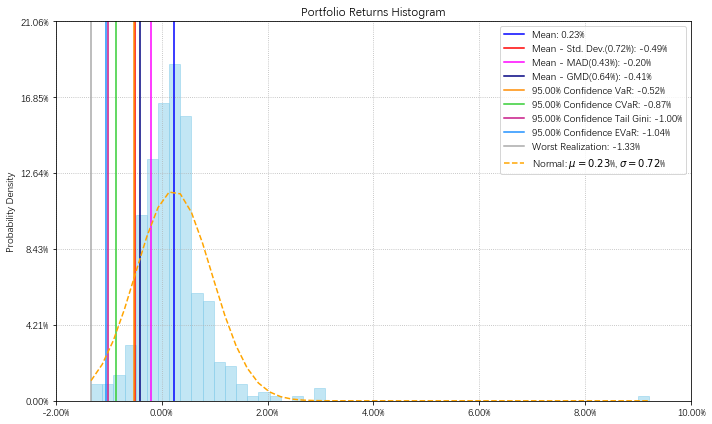

In [89]:
ax = rp.plot_hist(returns=Y, w=w, alpha=0.05, bins=50, height=6,
                  width=10, ax=None)

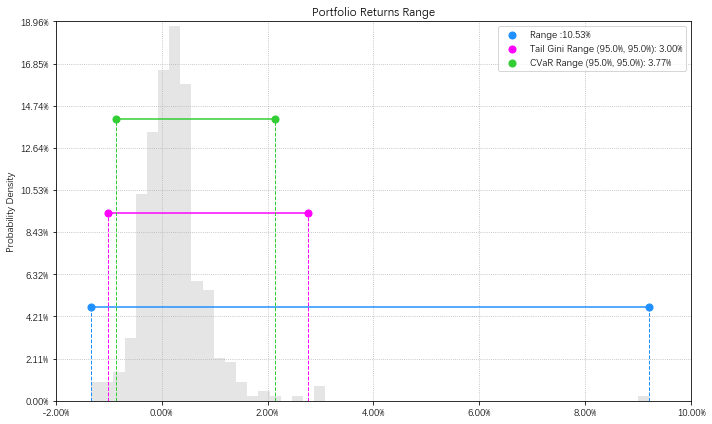

In [90]:
ax = rp.plot_range(returns=Y, w=w, alpha=0.05, a_sim=100, beta=None,
                b_sim=None, bins=50, height=6, width=10, ax=None)

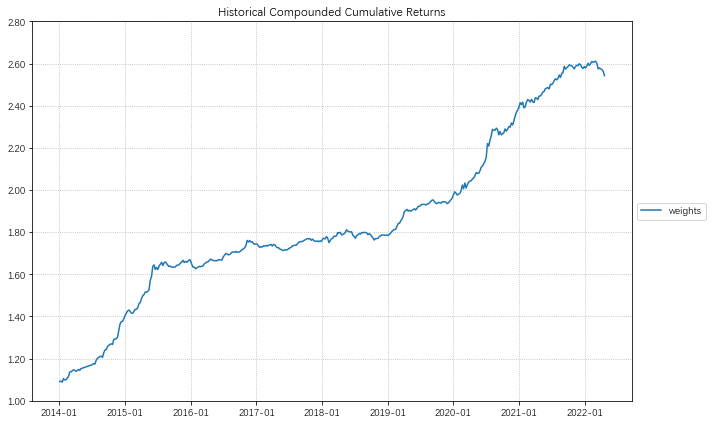

In [91]:
ax = rp.plot_series(returns=Y, w=w, cmap='tab20', height=6, width=10,
                    ax=None)

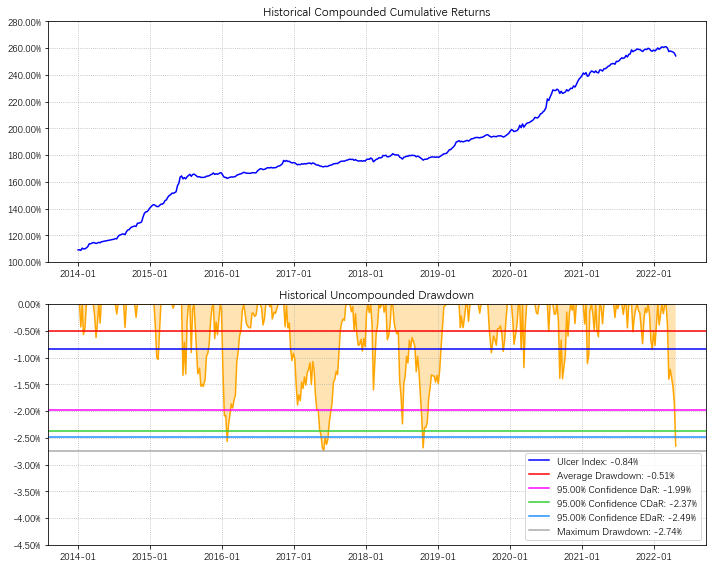

In [92]:
nav=port.nav

ax = rp.plot_drawdown(nav=nav, w=w, alpha=0.05, height=8, width=10, ax=None)

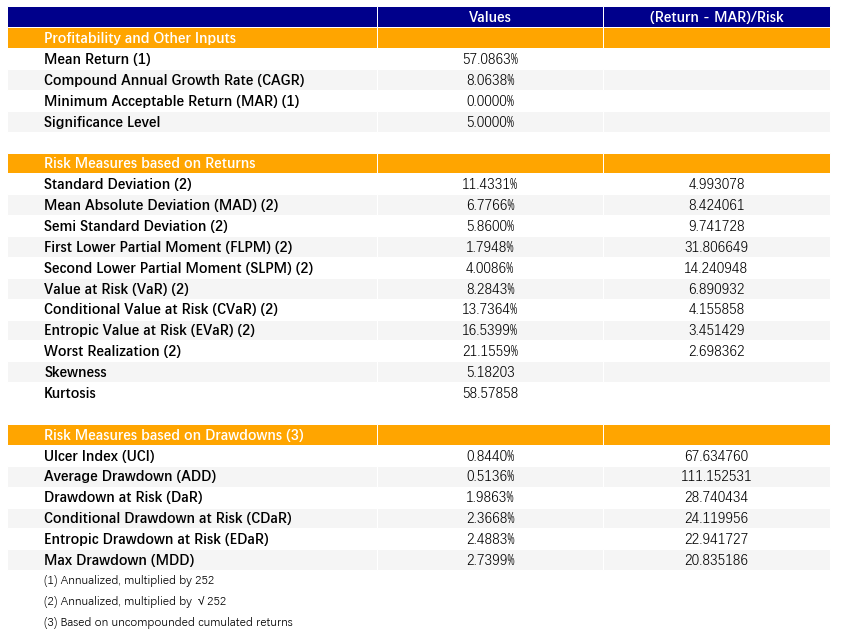

In [93]:
ax = rp.plot_table(returns=Y, w=w, MAR=0, alpha=0.05, ax=None)

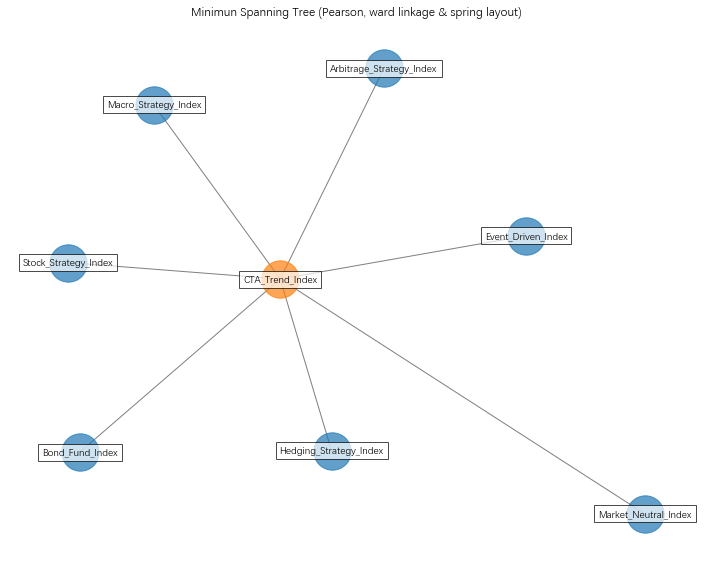

In [94]:
ax = rp.plot_network(returns=Y, codependence="pearson",
                     linkage="ward", k=None, max_k=10,
                     alpha_tail=0.05, leaf_order=True,
                     kind='spring', ax=None)

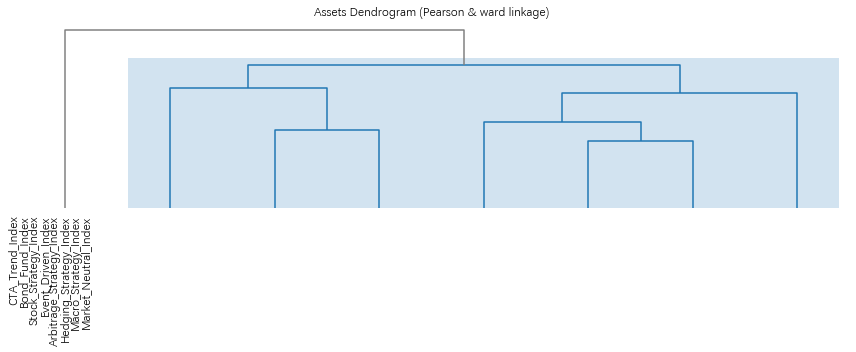

In [95]:
ax = rp.plot_dendrogram(returns=Y,
                        linkage='ward', k=None, max_k=10,
                        leaf_order=True, ax=None)